# SEARCHING (Arama)

Searching, bir öğe koleksiyonunda belirli bir öğeyi bulmanın algoritmik işlemidir. Searching, öğenin mevcut olup olmadığına ilişkin olarak genellikle Doğru veya Yanlış olarak yanıt verir. Bazen öğenin bulunduğu yere geri dönmek için değiştirilebilir.

Python'da bir öğenin bir öğe listesinde olup olmadığını sormanın çok kolay bir yolu vardır. **in** operatörünü kullanırız. Ancak bunu yazmak kolay olsa da, soruyu cevaplamak için temel bir süreç yürütülmelidir. Öğeyi aramanın birçok farklı yolu vardır. 

In [1]:
print(15 in [3,5,4,2,3,1])
print(3 in [3,5,4,2,3,1])

False
True


## The Linear/Sequential Search (Doğrusal/Sıralı Arama) 

Listedeki ilk öğeden başlayarak, aradığımızı bulana veya öğeler bitene kadar öğeler arasında sırayla gezinme işlemidir. Eğer öğeler biterse, aradığımız öğe, listede yok demektir.

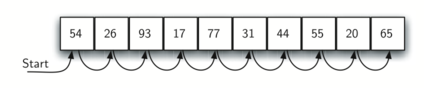

Aşağıdaki kod bloğunda, aradığımız elemanın listede olup olmadığını bulan bir fonksiyonu sequential search algoritması şeklinde yazalım.  

In [2]:
def sequentialSearch(alist, item):
    #1
    pos = 0
    found = False
    
    #2
    while pos < len(alist) and not found:
        if alist[pos] == item:
            found = True
        else:
            pos = pos + 1
            
    return found

testlist = [1, 2, 32, 8, 17, 19, 42, 13, 0]
print(sequentialSearch(testlist, 3))
print(sequentialSearch(testlist, 8))

False
True


+ 1-) **pos = 0** olarak oluşturuduğumuz değişken, girilen listedeki değerleri gezinmemizi sağlar ve eşitlik sağlanmayıp değeri 1 artırıldığında **karşılaştırılan elemanları tekrardan karşılaştırma yapmamamızı sağlar** ve time complexity'i azaltır. **found = False** olarak oluşturduğumuz değişken ise, aradığımız öğe listede varsa True yoksa False olacaktır ve kullandığımız while döngüsünün devamlığını veya durmasını sağlayan bir koşul olacaktır.


+ 2-) while işlemi; **pos** değişkeni, listenin uzunluğundan kısa olduğu müddetçe **(eğer pos > len(alist) olursa bütün öğeler gezilmiş ve aranan öğe listede bulunamamış demektir)** ve **found = False** olduğu müddetçe devam edecektir. **if alist[pos] == item** bloğu, girilen listedeki **pos** değişkeninin değerine eşit olan index, aranan öğeye yani **item** parametresine eşitse **found = True** olacak, döngü duracak ve aradığımız öğenin listede olduğunu ifade edecek. Eğer **item** parametresine yani aradığımız öğeye eşit değilse, **pos** 1 artırılacak ve böylece bir sonraki elemanla karşılaştırma yapılabilecek.

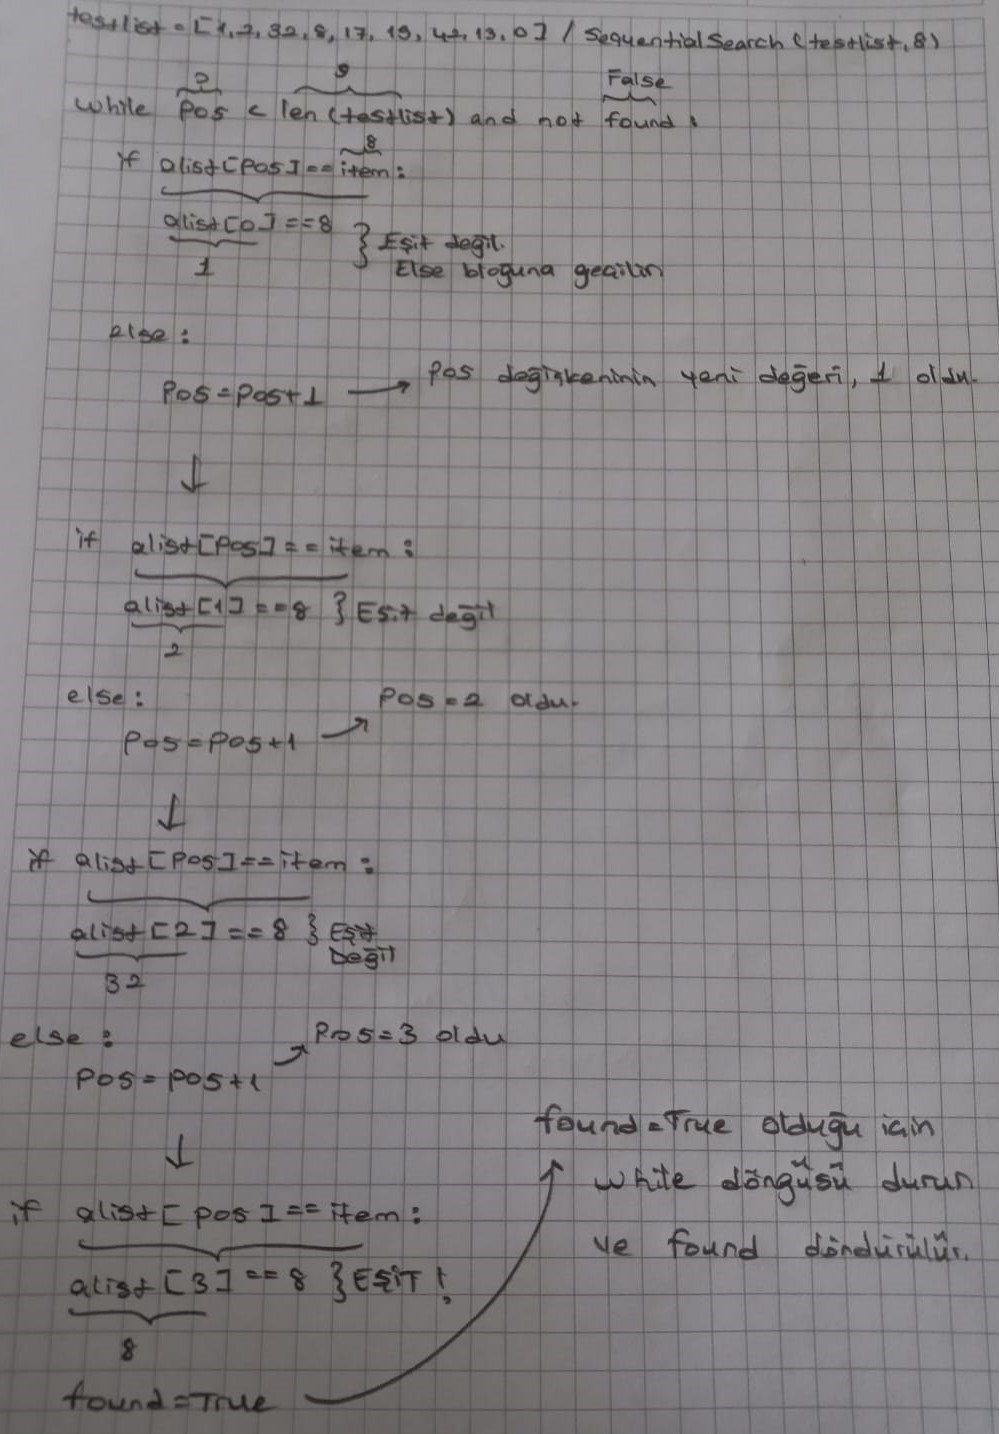

### < Analysis Of Sequential Search (Sıralı Aramanın Analizi) > 

Linear/sequential search'ün analizini yapmak için, gerçekleştirilen karşılaştırmaların sayısını sayabiliriz. Her karşılaştırma, aradığımız öğeyi bulabilir ya da bulamayabilir. Ayrıca listedeki öğeler herhangi bir şekilde sıralanmamıştır. Yani öğelerin sırası rastgele. Bu da demektir ki aradığımız öğenin belirli bir konumda olma olasılığı, listenin her konumu için tamamen aynıdır.

Aradığımız öğenin listede olmadığını anlamanın tek yolu aradığımız öğeyi, mevcut her öğeyle karşılaştırmaktır. **n** tane öğe varsa, linear/sequential search algoritması **n** defa arama yapacaktır.

Öğe listede varsa meydana gelebilecek 3 farklı senaryo vardır: 
+ En iyi durum; aradığımız öğenin, listenin ilk öğesi olması. Sadece 1 karşılaştırma yetecek.
+ En kötü durum; aradığımız öğenin, listenin son öğesi olması. Listedeki eleman sayısı kadar karşılaştırma gerekcek.
+ Ortalama durum; ortalama olarak, öğeyi listenin yaklaşık ortalarında bulmamız. Yani, **n/2** adet öğeyle karşılaştırma yapacağız. 

Sonuç olarak, öğe sayısı (n) arttıkça yapacağımız karşılaştırma, arama sayısı da artacağından dolayı Linear/sequantial search algoritmasının karmaşıklığı **O(n)** olacaktır.

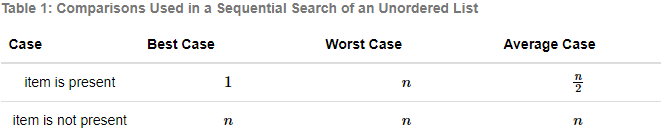

Eğer listedeki öğeler büyükten küçüğe ya da küçükten büyüğe şekilde sıralanmış olursa ve aradığımız öğe listede varsa, yukarıdaki aynı durumlar gerçekleşir. Ancak öğe listede yoksa, öğelerin sıralanması küçük bir avantaj sağlar. Aradığımız öğeden daha büyük veya daha küçük bir öğeye denk geldiğimizde aramayı bitirebiliriz ve geriye kalan öğeleri aramamıza gerek kalmaz. Böylece karmaşıklığı azaltmış oluruz. 

Aşağıdaki kod bloğunda, öğeler sıralanmış haldeyken bir linear/sequential search algoritması yazalım ve aranan öğeyi bulalım. 

In [3]:
def orderedSequentialSearch(alist, item):
    #1
    pos = 0
    found = False
    stop = False
    
    while pos < len(alist) and not found and not stop: 
        if alist[pos] == item:
            found = True   
        else:
            #2
            if alist[pos] > item:
                stop = True
            else:
                pos = pos + 1
                
    return found

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]
print(orderedSequentialSearch(testlist, 3))
print(orderedSequentialSearch(testlist, 17))

False
True


+ 1-) **pos = 0** olarak oluşturuduğumuz değişken, girilen listedeki değerleri gezinmemizi sağlar ve eşitlik sağlanmayıp değeri 1 artırıldığında karşılaştırılan elemanları tekrardan karşılaştırma yapmamamızı sağlar ve time complexity'i azaltır. **found = False** olarak oluşturduğumuz değişken ise, aradığımız öğe listede varsa True yoksa False olacaktır ve kullandığımız while döngüsünün devamlığını veya durmasını sağlayan bir koşul olacaktır. **stop = False** olarak oluştuduğumuz değişken ise liste sıralı olduğundan dolayı aradığımız öğe listede yoksa, aradığımız öğeden daha büyük bir öğeye gelirsek döngüyü durdurup diğer öğelere boş yere karşılaştırma uygulamamızı engellemek için döngüyü durduracak bir koşul olacaktır.


+ 2-) **if alist[pos] > item:** koşulu sağlanırsa **stop = True** olacak ve aradığımız öğeden daha büyük bir öğeye denk geldiğimiz anlamına gelecek. Bu yüzden de döngü duracak ve geri kalan öğelerle boş yere karşılaştırma yapılmayacak. Eğer sağlanmazsa **pos**, 1 artacak ve döngü başa dönüp tekrarlanacak. 

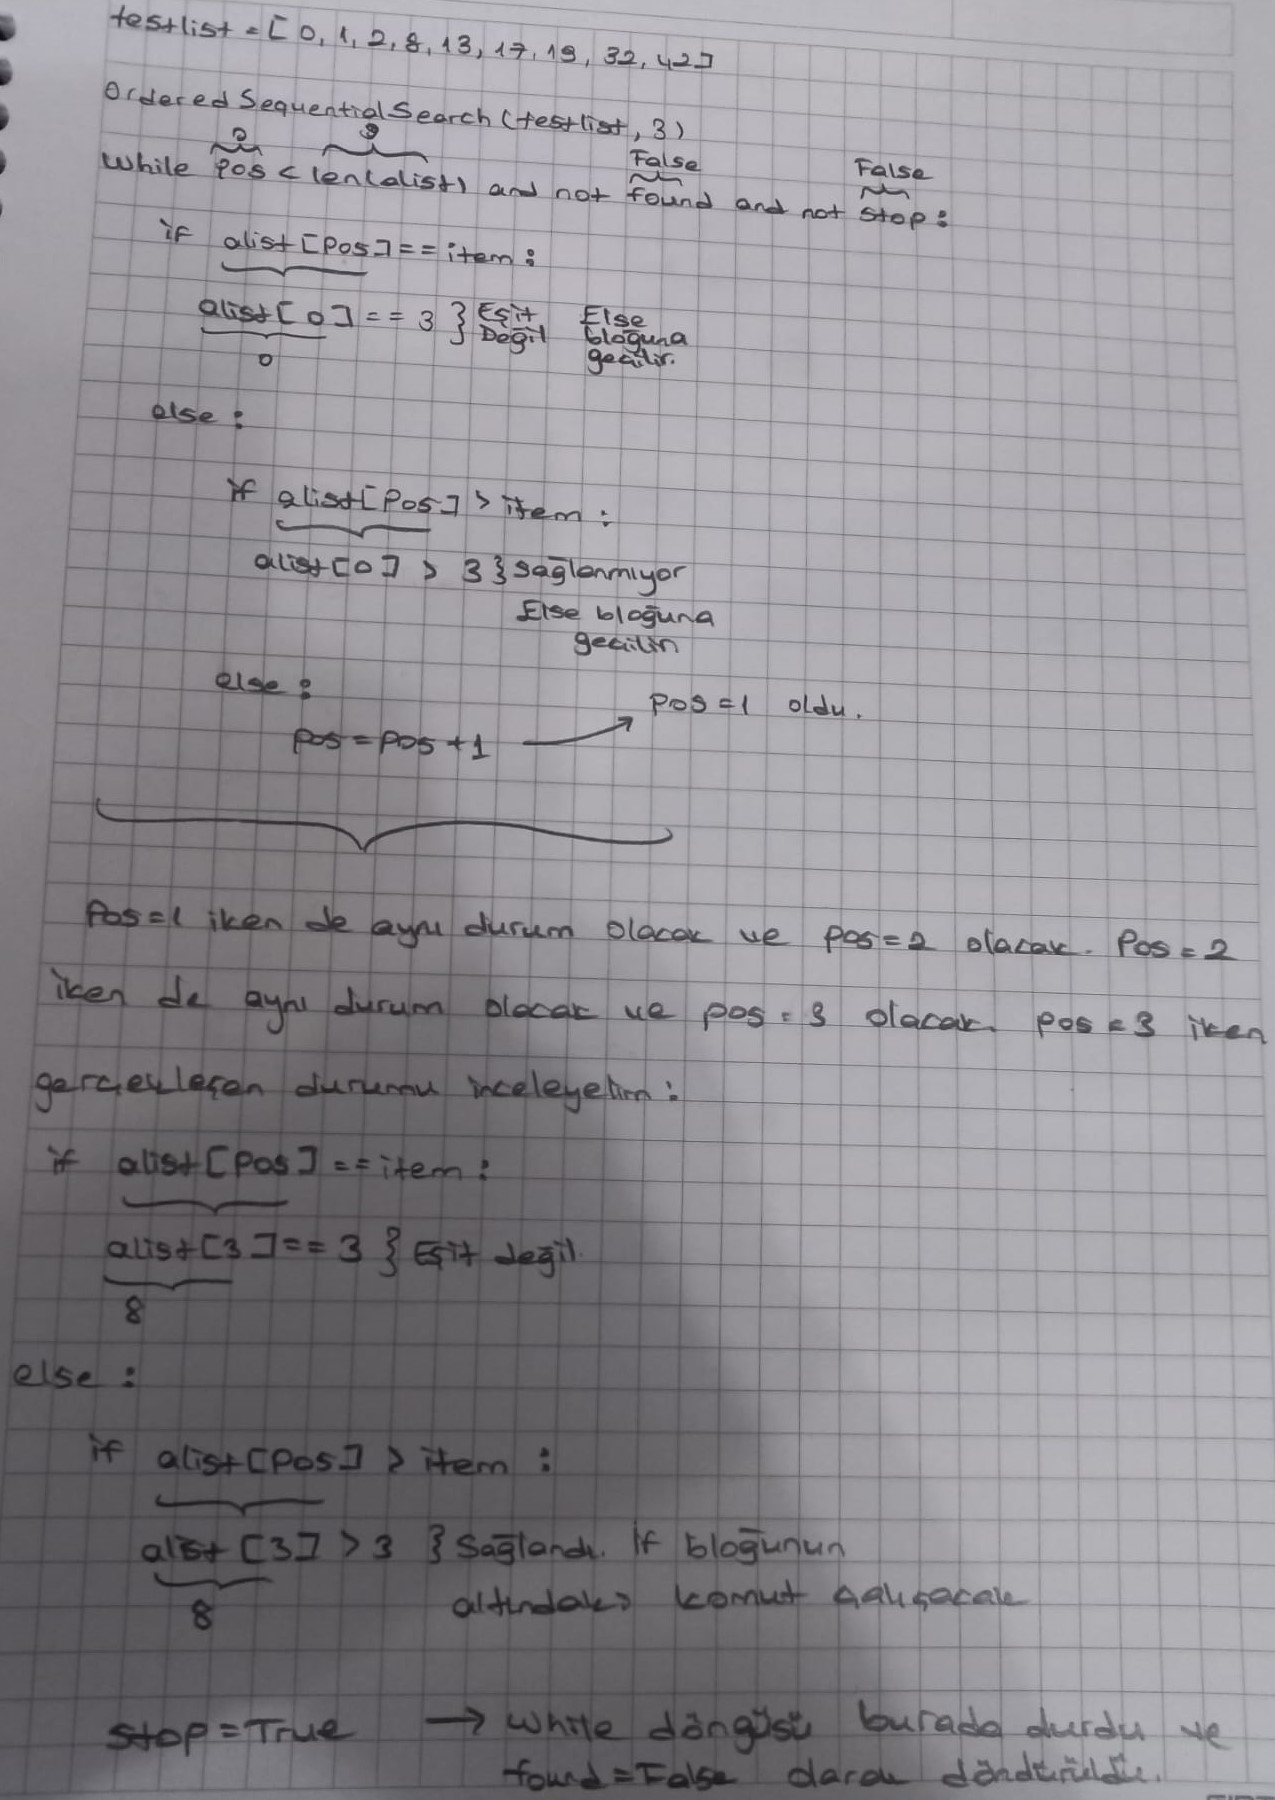

Listedeki öğeler sıralanmış olsa da, n arttıkça yapılacak arama sayısı artacağı için karmaşıklık, yine **O(n)** olacaktır.

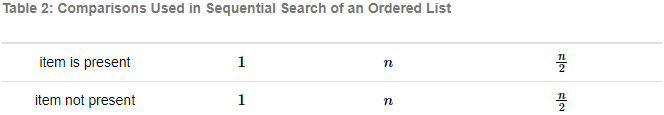

## The Binary Search (İkili Arama)

Binary search; sıralı bir listeyi baştan başlayıp sırayla aramak yerine, ortadaki öğeden incelemeye başlayarak bir arama yapmaktır. Eğer aradığımız öğe ortadaki öğeyse, işimiz biter. Ancak ortadaki öğe, aradığımız öğe değilse kalan öğelerin yarısını elemek için listenin sıralı yapısını kullanabiliriz. Sıralı bir liste, büyükten küçüğe ya da küçükten büyüğe sıralandığı için, ortadaki öğenin solundaki kısım, ortadaki öğeden daha küçük ve ortadaki öğenin sağındaki kısım, ortadaki öğeden daha büyük olacaktır. Aradığımız öğe ortadaki öğeden daha büyükse, ortadaki öğenin sadece sağında kalan öğeleri inceleyebiliriz. Veya daha küçükse, ortadaki öğenin sadece solunda kalan öğeleri inceleyebiliriz. Böylece daha az öğe incelemiş oluruz ve karmaşıklığı azaltmış oluruz.

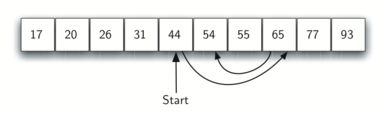

Aşağıdaki kod bloğunda, binary search algoritması ile listede aranan bir elemanı bulalım. 

In [4]:
def binarySearch(alist, item):
    #1
    first = 0 
    last = len(alist) - 1
    found = False
    
    #2
    while first <= last and not found:
        #2.1
        midpoint = (first + last) // 2 
        if alist[midpoint] == item:
            found = True
        #2.2    
        else:
            if item < alist[midpoint]:
                last = midpoint - 1 
            else:
                first = midpoint + 1
                
    return found 

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]
print(binarySearch(testlist, 3))
print(binarySearch(testlist, 17))

False
True


+ 1-) Binary search algoritmasını uygulamak demek, ortanca öğeden başlamak demek. Bu yüzden döngüdeki aramayı ortanca öğeden başlatabilmek için **first = 0** ve **last = len(alist) - 1** değişkenlerini tanımladık. **last** değişkeninde 1 çıkarılmasının nedeni; indexin 0'dan başlıyor olmasıdır. Eğer direkt olarak **last = len(alist)** yazarsak, döngü içerisinde listenin eleman sayısıyla ilgili hata alırız. Aradığımız öğünün bulunup bulunmadığını ifade eden ve döngünün devam edeceğine ya da etmeyeceğine dair bir koşul oluşturacak olan **found = False** değişkenini de oluşturduk.


+ 2-) While döngüsü, **first <= last** olduğu ve **found = False** olduğu sürece devam edecek.


+ 2.1-) **midpoint = (first + last) // 2** olarak oluşturduğumuz öğe bizim ortanca öğemiz olmuş olacak. Böylece **if alist[midpoint] == item** dediğimizde, alist parametresine girilen listenin ortanca öğesinden arama yapılmaya başlanacak. Eğer aradığımız öğe, direkt ortanca öğe ise **found = True** olacak ve döngü bitecek.


+ 2.2-) Else bloğu altındaki **if item < alist[midpoint]** satırı sağlanırsa **last = midpoint - 1** olur. Bu da demektir ki aradığımız öğe, ortanca öğeden küçük. Yani ortanca öğenin sol tarafında kalıyor. **last = midpoint - 1** olunca, listenin sadece sol tarafındaki öğeleri kontrol etmemiz sağlanıyor. Eğer if bloğu sağlanmaz ve **else** bloğu çalışırsa, **first = midpoint + 1** olur. Bu da demektir ki aradığımız öğe, ortanca öğeden büyük. Yani ortanca öğenin sol tarafında kalıyor. **first = midpoint + 1** olunca da listenin sadece sağ tarafındaki öğeleri kontrol etmemiz sağlanıyor. Böylece öğe bulunana kadar arama yapılmaya devam ediliyor. Bulunamazsa **found = False** olarak döndürülüyor.

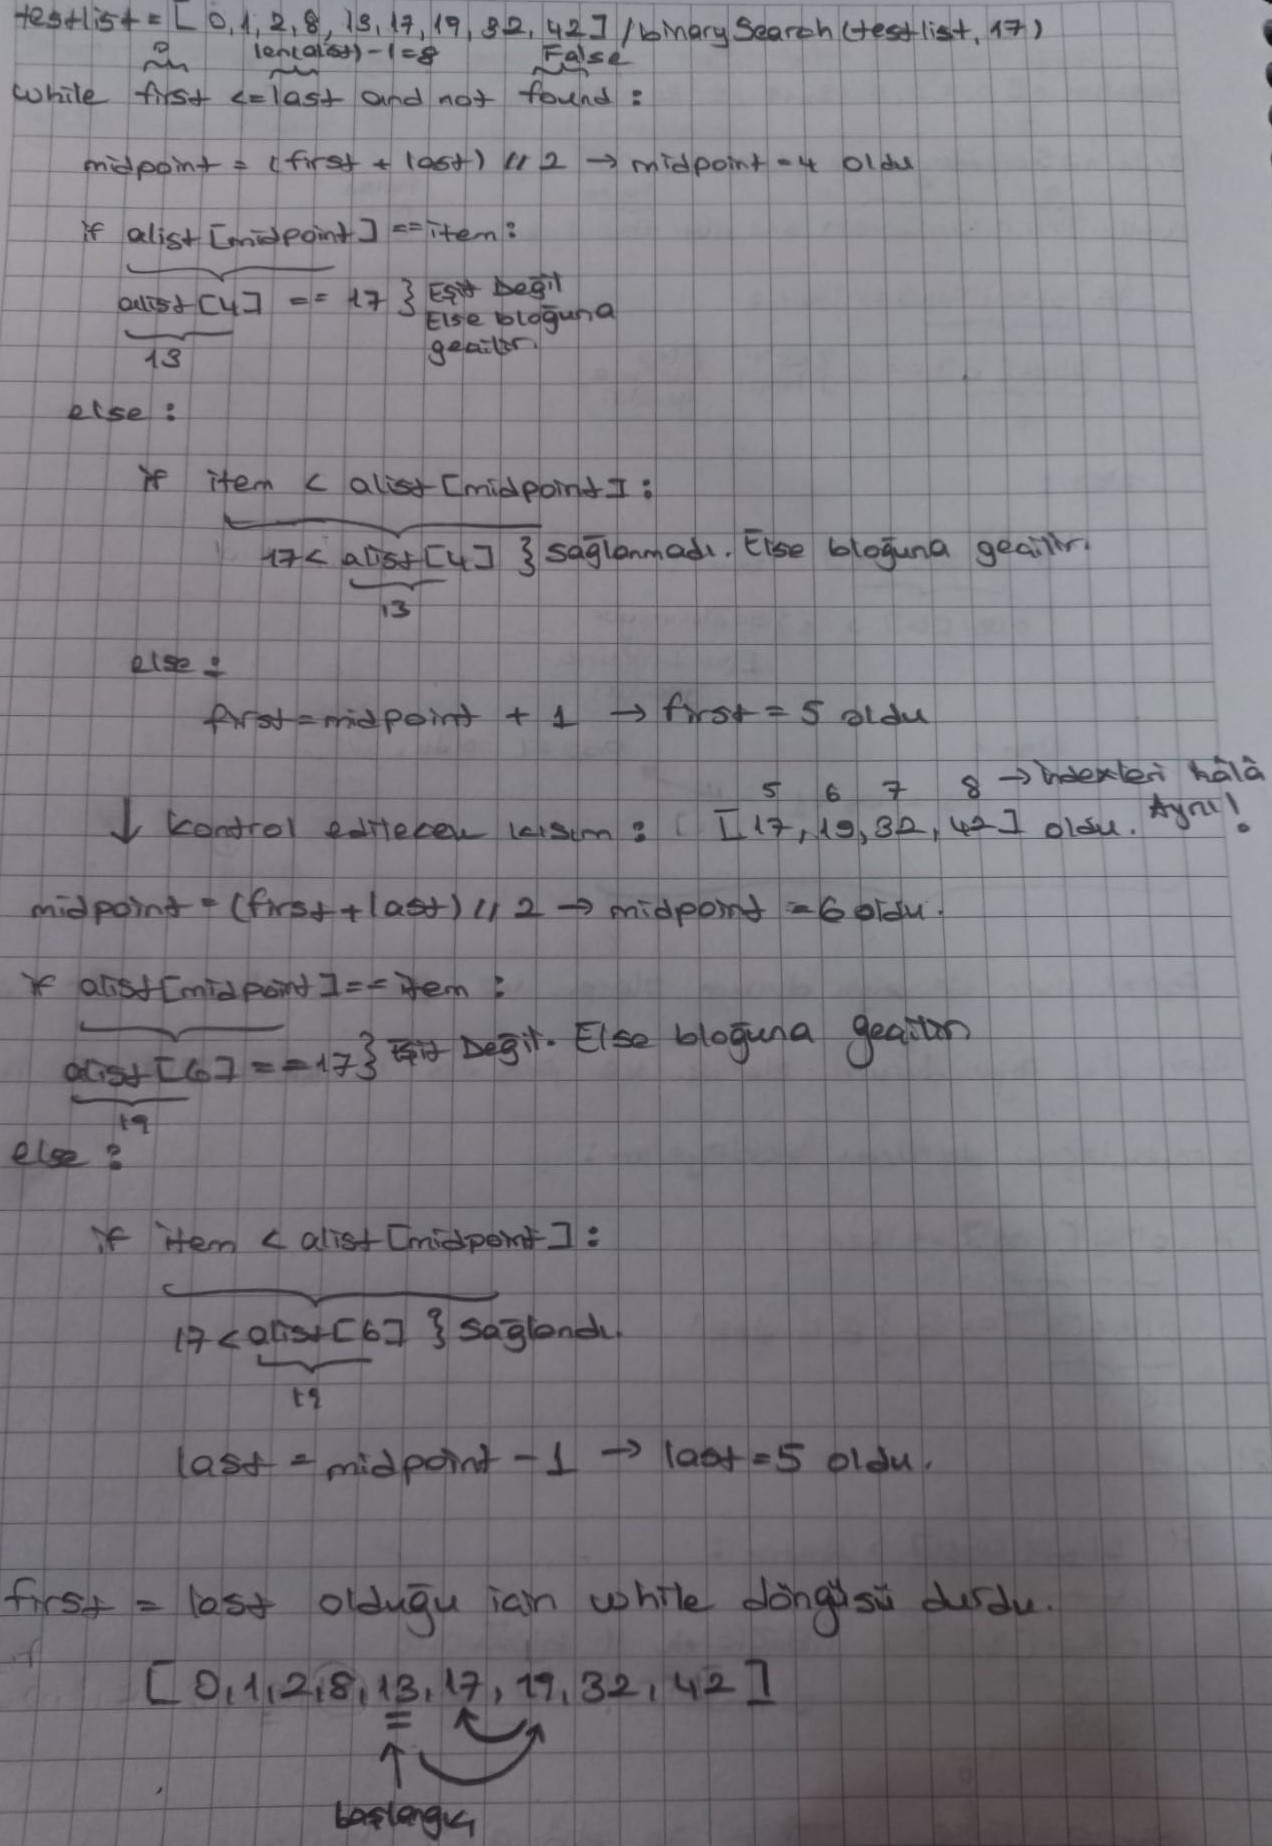

Aslında binary search algoritmasını kullanırken recursion yapıyoruz. Sorunu daha küçük parçalara böldüğümüz, daha küçük parçaları bir şekilde çözdüğümüz ve daha sonra sonucu elde etmek için tüm sorunu yeniden birleştiriyoruz. Bir listede binary search yaptığımızda, önce orta öğeyi kontrol ederiz. Aradığımız öğe orta öğeden daha azsa, orijinal listenin sol yarısında ikili bir arama yapabiliriz. Aynı şekilde, öğe daha büyükse, sağ yarının ikili bir araştırmasını yapabiliriz. Her iki durumda da, daha küçük bir listede geçen ikili arama işlevine özyinelemeli bir çağrı yapmış oluruz.

Aşağıdaki kod bloğunda, yukarıdaki fonksiyonda recursion kullanalım. 

In [5]:
def binarySearch(alist, item):
    #1
    if len(alist) == 0:
        return False
    #2
    else:
        #2.1
        midpoint = len(alist) // 2
        if alist[midpoint] == item:
            return True
        #2.2
        else:
            #2.3
            if item < alist[midpoint]: 
                return binarySearch(alist[:midpoint], item)
            else:
                return binarySearch(alist[midpoint + 1:], item) 
            
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]            
print(binarySearch(testlist, 3))
print(binarySearch(testlist, 17))

False
True


+ 1-) Bir recursion algoritmasının temel durumu olmalı. **if len(alist) == 0** koşulunun sağlanması demek, arama yapacağımız listede elemanın olmaması anlamına gelmektedir ve dolayısıyla arayacağımız eleman bu listede yok demektir. Bu durum da, algoritmamızın temel durumudur. 


+ 2-) Recursion algoritması, temel duruma doğru ilerlemesi gerektiği için listedeki elemanları gitgide azaltmamız gerekecek. else bloğu bunu yapmaktadır. Eğer olur da arama yaptığımız listedeki eleman sayısını 0'a kadar indirilebilirsek, aradığımız elemanın listede olmadığı kanısına ulaşırız ve False değerini döndürürüz.


+ 2.1-) Listenin ortasındaki elemandan başlayabilmek için **midpoint = len(alist) // 2** olacak şekilde, aramayı listenin ortasından başlatmak için bir **midpoint** değişkeni tanımladık. Bu değişken, arama yapacağımız listede, ortanca elemandan başlamak için kullanacağımız bir index görevi görecek. **if alist[midpoint] == item** koşulu sağlanırsa, aradığımız eleman direkt olarak listenin ortasındaki eleman demektir. Yani aradığımız eleman listede vardır ve True döndürülür.


+ 2.2-) Eğer else bloğunun altındaki if bloğu (2.1) sağlanmazsa, bu else bloğunun altındaki komutlar çalışacak demektir. Bu else bloğunun altındaki kod blokları aramaya, aradığımız değer ortanca değerden büyükse listenin sağ tarafından, küçükse sol tarafından devam etmemizi sağlayacaklar.


+ 2.3) **if item < alist[midpoint]** koşulu sağlanırsa aradığımız öğe, ortanca öğenin sol tarafında kalıyor (yani ortanca öğeden daha küçük) demektir. Bir recursion uygulayarak listenin sadece sol tarafındaki elemanlarla tekrar arama yapmamızı sağlayacak, **return binarySearch(alist[:midpoint], item)** kodunu yazdık. Eğer sağlanmazsa aradığımız öğe, ortanca öğenin sağ tarafında kalıyor (yani ortanca öğeden daha büyük) demektir. Bir recursion uygulayarak listenin sadece sağ tarafındaki elemanlarla tekrardan arama yapmamızı sağlayacak, **return binarySearch(alist[midpoint + 1:], item)** kodunu yazıyoruz. Burada **midpoint + 1** işlemindeki **+1**, ortanca elemanı sorgulanacak yeni listeye almamayı sağlar. Çünkü bu blok çalışıyorsa, aradığımız eleman ortanca elemanın sağında kalıyor ve ortanca elemana eşit değil demektir.

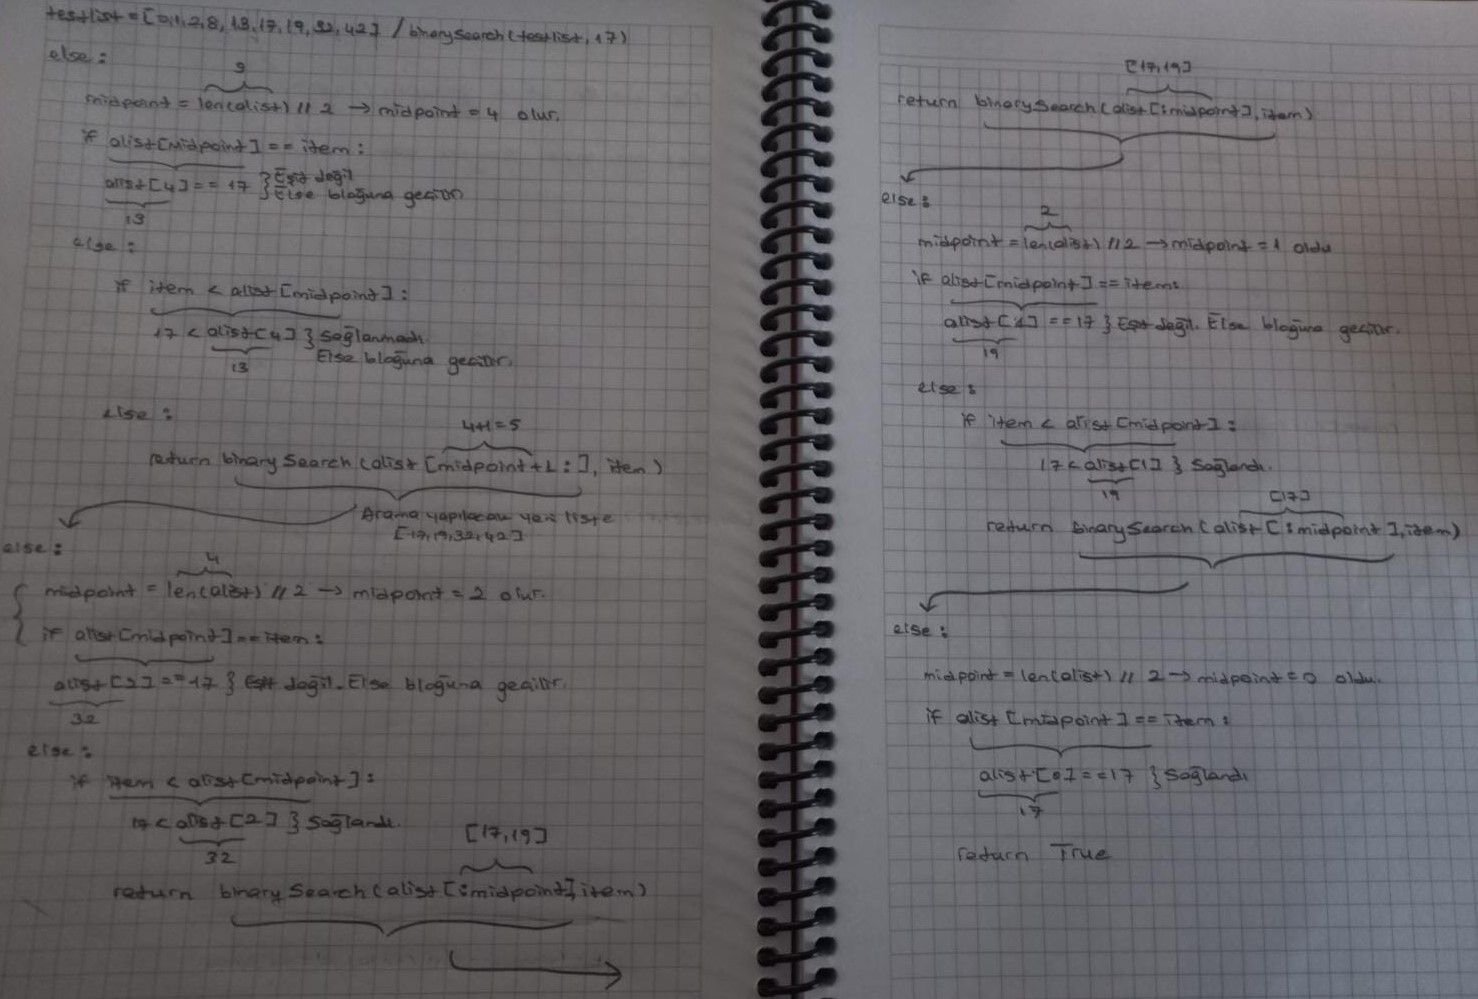

### < Analysis Of Binary Search (İkili Aramanın Analizi) >

Karşılaştırmaya n öğe ile başlarsak, ilk karşılaştırmadan sonra yaklaşık n/2 öğe kalır. İkinci karşılaştırmadan sonra yaklaşık n/4 olacaktır. Sonra n/8, n/ 16, diye devam eder. Aşağıdaki tablo bunu özetler: 

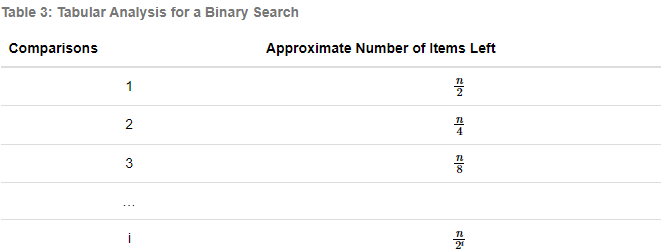

Tabloya bakılınca görürüz ki; karşılaştırma sayısı arttıkça, arama yapılacak olan listedeki eleman sayısı logaritmik olarak azalıyor. Bu da karmaşıklığın **O(logn)** olduğu anlamına gelir.

## Hashing (Karma)

Linear ve Binary searching algoritmalarında, listedeki öğelerin birbirine göre nerede depolandığı bilgisinden yararlanarak algoritmamızda iyileştirme yapabildik. Örneğin, bir listenin sıralı olduğunu bildiğimiz için binary search algoritması kullanarak **O(logn)** zamanda arama yapabildik. Hashing dediğimiz şey ise: 

Bizim oluşturacağımız bir veri yapısı olacak ve bu veri yapısı **O(1)** zamanda aranabilen bir veri yapısı olacak. Bu sayede daha az karmaşıklıkla arama yapabileceğiz. Bunu yapmak için de listede arama yapacağımız zaman, listedeki öğelerin yerleriyle ilgili daha fazla bilgi sahibi olmamız gerekecek. Hashing, **hash fonksiyonları** olarak bilinen matematiksel formülleri kullanarak değişken büyüklükteki bir girdiden, sabit boyutlu bir çıktı üretme sürecini ifade eder. Bu teknik, bir veri yapısındaki bir öğenin depolanması için bir dizin veya konum belirler.

**Hash Table :** **Hash function (hash işlevi)** adı verilen özel bir işlev kullanarak anahtarları değerlerle eşleyen bir veri yapısıdır. Hash table'ın, **slot** adı verilen, öğeleri tutabilen konumları vardır. Bu **slotların** her biri, sadece 1 öğeyi tutabilir. **Slotlar**, 0'dan başlayan tamsayı değerleriyle adlandırılır. Bu değerler de indexlerdir. Aşağıdaki görselde, 11 adet slotu bulunan, hiçbir öğe içermeyen bir hash table gösterilmektedir.

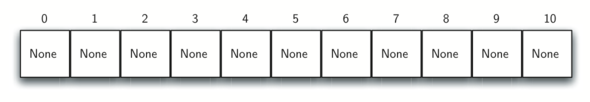

**Hash Function :** Bir öğe ile o öğenin hash tablosudaki ait olduğu slot arasındaki eşleşmeyi sağlayan fonksiyondur. Bu eşleşmeyi belirli matematiksel formüller ile gerçekleştirir. Depolanacak olan öğenin **hash değerini** bu matematiksel formüller ile hesaplar ve çıkan sonuca göre slotlara yerleştirir. Bu formüllere örnek olarak; **remainder method (kalan metodu)** verilebilir. Örneğin 11 slotluk bir hash tablomuz var ve **54, 26, 93, 17, 77 ve 31** sayılarını bu tablodaki slotlara yerleştirmek istiyoruz. **Remainder method (kalan metodu)** şu formül ile sayıların **hash değerlerini** bulur: **h(item) = item % 11 (hash tabledaki slot sayısı)**. Bulduktan sonra da slotlara yerleştirir. Aşağıdaki görselde, yapılan hesaplama sonucu öğeler ve onların **hash değerleri** gösterilmekte.

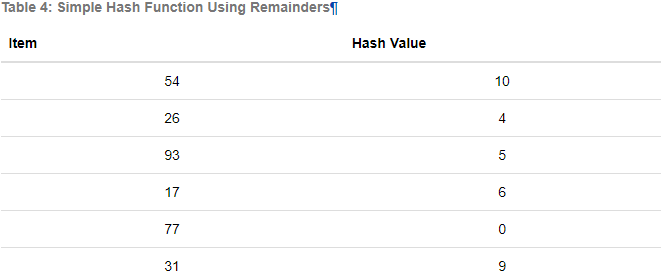

Bu değerlerin 11 slotluk Hash tablosuna yerleştirilmiş halleri: 

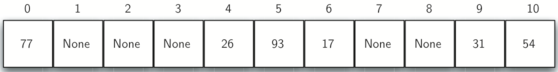

**Hashing İşleyişi :**

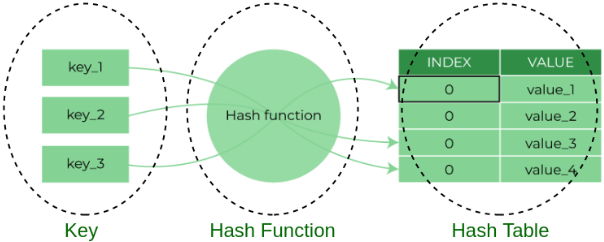

Özetleyecek olursak: Bir öğe aramak istediğimizde, öğenin hash değerini hesaplamak için hash fonksiyonunu kullanıyoruz ve ardından, aradığımız öğenin var olup olmadığını görmek için hash tablosunu kontrol ediyoruz. Bu arama işleminin karmaşıklığı **O(1)**'dir çünkü; hash değerini hesaplamak ve ardından hash tablosundaki slotun konumunu (indexini) incelemek için sabit bir süre gerekir. 

Ancak şunun farkına varmak lazım: Bu durum yalnızca, her öğenin hash tablosunda benzersiz bir konuma sahip olduğunda gerçekleşebilir. Örneğin, listedemizde 44 numaralı bir öğe daha olsaydı, **remainder method (kalan metodu)** ile hesaplama yaptığımızda elde edeceğimiz hash değeri **44 % 11 == 0** olurdu. Ancak 77'nin de hash değeri 0 olduğundan ortaya bir sorun çıkar. Bu soruna **collision (çarpışma)** adı verilir. İlerleyen kısımlarda **collision (çarpışma)** konusunu inceleyeceğiz.

### < Hash Functions (Hash İşlevleri) > 

Bir öğe koleksiyonu (liste) verildiğinde, her öğeyi benzersiz bir slota eşleyen bir hash işlevi; **perfect hash function (mükemmel hash işlevi)** olarak adlandırılır. Öğelerin ve listenin asla değişmeyeceğini biliyorsak, o zaman mükemmel bir hash fonksiyonu oluşturmak mümkündür. Ama ne yazık ki keyfi bir öğe listesi verildiğinde, mükemmel bir hash işlevi oluşturmanın sistematik bir yolu yoktur. Neyse ki, yine de performans verimliliği elde etmek için hash fonksiyonunun mükemmel olmasına ihtiyacımız yok. 

Her zaman mükemmel bir hash işlevine sahip olmanın bir yolu, **öğe aralığındaki olası her değerin barındırılabilmesi için hash tablosunun boyutunu artırmaktır.** Bu, her öğenin benzersiz bir yuvaya sahip olacağını garanti eder. Bu yöntem, az sayıda öğe için pratik olsa da, olası öğe sayısı çok olduğunda uygulanabilir değildir. Örneğin, öğeler dokuz haneli Sosyal Güvenlik numaraları olsaydı, bu yöntem neredeyse bir milyar yuva gerektirirdi. Ya da, yalnızca 25 kişilik bir sınıf için veri depolamak isteseydik, çok büyük miktarda hafızayı boşa harcardık.

Amacımız; **collision (çarpışma)yı en aza indiren, hesaplaması kolay ve hash tablosundaki öğeleri eşit şekilde dağıtan** bir hash işlevi oluşturmaktır. Bunu sağlayan birkaç metottan 2 tanesi: **Folding Method (Katlama Yöntemi)** ve **Mid-Square Method (Orta Kare Yöntemi)**dir.

**Folding Method (Katlama Yöntemi) :**

Öğeyi eşit boyutlu parçalara böler (son parça eşit boyutta olmayabilir). Bu parçalar daha sonra, elde edilen hash değerini vermek için birbirine eklenir. Örneğin, öğemiz **436-555-4601** telefon numarası olsaydı, rakamları alır ve 2'li gruplara ayırırdık (43,65,55,46,01). Daha sonra bu 2'li grupları toplar ve **43 + 65 + 55 + 46 + 01 = 210** elde ederdik. Hash tablomuzun 11 slotu olduğu varsayarsak, telefon numarasının hash değerini elde etmek için; **210 % 11 = 1** işlemini yapar ve 1 değerini elde ederiz. Bu nedenle 436-555-4601 telefon numarası, 1. slota hash işlemi yapar ve 1. slota yerleşir.

Bazı **folding methodlar (katlama yöntemi)** bir adım daha ileri gider ve eklemeden önce her parçayı tersine çevirir. **436-555-4601** telefon numarası için elde edeceğimiz 2'li gruplar şu şekilde olurdu; (43, 56, 55, 65, 01). Dikkat edersek ilk ve son 2'li grupları değiştirmedik. Bu değerleri toplar ve remainder metodunu uygularsak, **219 % 11 = 10** elde ederiz ve numarayı 10. slota yerleştiririz.

**Mid-Square Method (Orta Kare Yöntemi) :**

Önce öğenin karesini alırız ve sonra elde edilen rakamların bir kısmını kullanırız. Örneğin öğemiz 44 olsaydı, **44 üssü 2 = 1936** olurdu. Ortadaki iki basamak olan 93'ü kullanır ve **93 % 11 = 5** elde ederdik. Böylece 44 sayısının hash değeri 5 olmuş olurdu ve 5. slota yerleşirdi. Aşağıdaki görselde, **remainder method vs mid-square method** karşılaştırması yer almakta: 

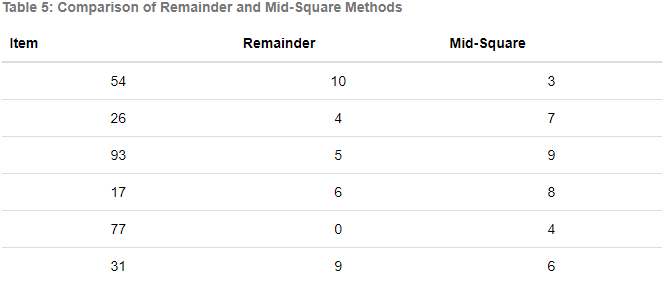

String öğeler için de hash işlevleri oluşturabiliriz. 

Aşağıdaki kod bloğunda "cat" sözcüğünün her bir karakteri için, **ord()** metodu ile, belirtilen karakterin unicode kodunu temsil eden sayıyı döndürelim ve her karakterin hash değerlerini bulalım.

+ ord() = https://docs.python.org/tr/3/library/functions.html?highlight=ord#ord

In [6]:
print("'c' nin unicode kodunu temsil eden sayı = " , ord("c"))
print("'a' nın unicode kodunu temsil eden sayı = " , ord("a"))
print("'t' nin unicode kodunu temsil eden sayı = " , ord("t"))

'c' nin unicode kodunu temsil eden sayı =  99
'a' nın unicode kodunu temsil eden sayı =  97
't' nin unicode kodunu temsil eden sayı =  116


+ Bu unicode değerlerini toplayıp remainder metodunu uyguladığımız zaman, "cat" sözcüğünün hash değerini elde ederiz. 

  99 + 97 + 116 = 312
  
  312 % 11 = 4 elde edilir. "cat" sözcüğü, hash table'da 4. slota yerleşir.
  
  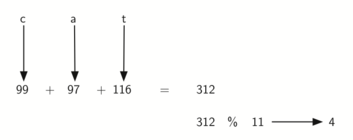
  
  
+ Unicode nedir? 
  
  Unicode, 0 ile 0x10FFFF (1.114.111 ondalık) arasındaki sayılar olan bir kod noktaları dizisidir. Bu kod noktaları dizisinin bellekte bir dizi kod birimi olarak temsil edilmesi gerekir ve kod birimleri daha sonra 8 bitlik baytlara eşlenir.

Aşağıdaki kod bloğunda, bir string ve hash table boyutu alan ve string'in hash table değerini döndüren bir fonksiyon yazalım.

In [7]:
def hash(astring, tablesize):
    #1
    sum = 0
    
    #2
    for pos in range(len(astring)):
        sum = sum + ord(astring[pos])
   
    #3
    return sum % tablesize

hash("cat", 11)

4

+ 1-) Unicode'ların toplamını temsil edecek olan **sum** adlı değişkeni tanımladık.

+ 2-) Girilen metindeki her bir harfin unicode değerini bulduk ve topladık. 

+ 3-) **sum** değişkenini, hash tablosundaki slot sayısına bölerek (remainder method) hash değerini bulduk. Bu değer, girilen metnin kaçıncı slota yerleştirileceğini gösterir.

Aşağıdaki kod bloğunda, yukarıdaki fonksiyona girilen string'in her bir harfinin sırasını ağırlık olarak kullanıp, fonksiyona ağırlıklandırma yapalım. Şunu demek istedim aslında :

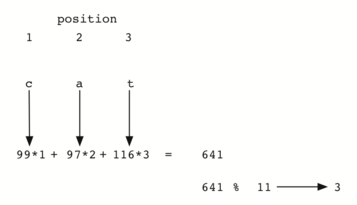

In [8]:
def hash(astring, tablesize):
    sum = 0
    for pos in astring:
        sum += ord(pos)*(astring.index(pos) + 1)
        
    return sum % tablesize

hash("cat", 11)

3

**Unutmamalıyız ki:**

Hash fonksiyonu, depolama ve arama sürecinin baskın parçası haline gelmemesi için verimli olması gerekir. Hash işlevi çok karmaşıksa, slot değerini (hash değerini) hesaplamak, basit bir sıralı veya ikili arama yapmaktan daha fazla iş haline gelir. Bu, hashing oluşturma amacını hızla ortadan kaldırır. 

### < Collision Resolution (Çarpışma Çözümü) >

İki öğenin hash değerinin aynı çıkıp aynı slota yerleştirilmesi gerektiğinde, ikinci öğeyi hash tablosuna yerleştirmek için sistematik bir yöntemimiz olmalı. Bu yönteme **collision resolution (çarpışma çözümü)** denir. Eğer hash fonksiyonu mükemmel ise **collision (çarpışma)** asla olmaz. Her öğe, ayrı bir slota yerleştirilebilir. Ama bu genellikle mümkün olmadığından, **collision resolution (çarpışma çözümü)** hashing'in çok önemli bir parçası haline gelir. Aşağıdaki paragrafta, **collision (çarpışma)'yı** çözmenin bir yolu olan **Open Adressing (Açık Adresleme)**'den bahsedeceğiz.

**Open Adressing (Açık Adresleme) ve Linear Probing (Lineer Araştırma) :**

**Collision (çarpışma)'yı** çözmenin bir yöntemi; hash tablosuna bakar ve **collision (çarpışma)'ya** neden olan öğeyi yerleştirmek için başka bir açık alan (başka bir slot) bulmaya çalışırız. Bunu yapmanın basit bir yolu, orijinal hash değeri konumundan (yerleştirilmesi gereken slot) başlayıp, boş olan ilk slotla karşılaşana kadar slotlar arasında sıralı bir şekilde hareket etmektir. Tüm hash tablosunu kaplamak için ilk slota (dairesel olarak) geri dönmemiz gerekebilir. Bu **collision resolution (çarpışma çözümü)** işlemi, hash tablosundaki bir sonraki açık slotu veya adresi bulmaya çalıştığı için **open adressing (açık adresleme)** olarak adlandırılır. Sistematik olarak her slotu birer birer ziyaret ederek; **linear probing (lineer araştırma)** adı verilen açık bir adresleme tekniği gerçekleştiriyoruz.

Örneğin, (54,26,93,17,77,31,44,55,20) sayılarından oluşan bir listemiz ve 11 slotluk bir hash tablomuz olduğunu varsayalım. Bu sayıları, **remainder method hash function (kalan yöntemi hash işlevi)** ile slotlara yerleştirmek isteyelim. Aşağıdaki görsel, sayıların slotlara yerleştirilmiş halini göstermekte: 

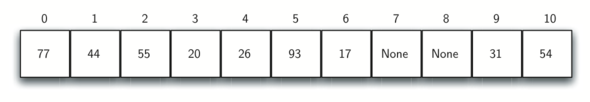

+ **77 % 11 = 0** ve **44 % 11 = 0** olacağından bir **collision (çarpışma)** olacaktır. **Linear probing (lineer araştırma)** adı verilen **open adressing (açık adresleme)** tekniği ile açık bir slot bulana kadar sıralı olarak, birer birer slotlar arasında geziniriz. Bu gezinme sonucu, 44 sayısını yerleştirmek için slot 1'i buluruz. **55 % 11 = 0** olduğundan dolayı yine bir collision (çarpışma) ortaya çıkar ve aynı yöntemi 55 sayısı üzerinde de uygularız ve slot 2'yi buluruz. Son eleman olan 20 sayısını slot 9'a yerleştirmemiz gerekir ama slot 9 dolduğu için yine aynı yöntemle slotlar arasında geziniyoruz. Dairesel olarak gezindiğimiz için 10, 0, 1 ve 2 numaralı slotları ziyaret ediyoruz ve sonunda slot 3'ü buluyoruz.

+ **Open Adressing (açık adresleme)** ve **linear probing (lineer araştırma)** kullanarak bir hash tablo oluşturduktan sonra, öğeleri aramak için de aynı yöntemleri kullanmamız çok önemlidir. 93 sayısını aradığımızı varsayalım. Hash değerini hesapladığımızda 5 buluyoruz. 5. slota baktığımızda, 93 sayısını görüyoruz ve True döndürüyoruz. Peki eğer  20 sayısını arasaydık ne oldurdu? Hash değerini hesapladığımızda 9 buluyoruz. 9. slota baktığımızda, 31 sayısını görüyoruz. **Collision (çarpışma)** olabileceğini bildiğimiz için direkt False döndüremeyiz! Bu yüzden 10. slottan başlayarak, 20 numaralı öğeyi bulana veya boş bir slot bulana kadar sıralı bir arama yaparız. Eğer aradığımız öğeyi bulursak True, bulamayıp boş bir slotla karşılaşırsak False döndürürüz.
  
  **Clustering (Kümeleme) Sorunu**
  
  
+ **Linear probing (lineer araştırma)**'nın bir dezavantajı, **clustering (kümeleme)** eğilimidir. Bu eğilim, öğelerin tabloda kümelenmesidir. Aynı hash değerinde çok sayıda **collision (çarpışma)** meydana gelirse, çevredeki bir dizi alanın (diğer boş slotların) **linear probing (lineer araştırma)** tarafından doldurulacağı anlamına gelir. Bu durumun, 20 numaralı öğeyi eklemeye çalıştığımızda olduğu gibi, eklenen diğer öğeler üzerinde bir etkisi olacaktır. Boş bir slot bulmak için 0'a hash yapan bir değerler kümesi (77, 44, 55) es geçildi.
  
  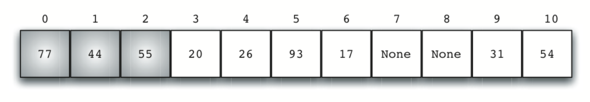   

**Clustering (kümeleme)** ile başa çıkmanın bir yolu: **Linear probing (lineer araştırma)** tekniğini genişleterek, sonraki açık slotu sırayla aramak yerine, slotları atlayarak **collision (çarpışma)**'ya neden olan öğeleri daha eşit bir şekilde dağıtmaktır. Bu, potansiyel olarak meydana gelecek olan **clustering (kümeleme)**'yi azaltacaktır. Yani **collision (çarpışma)**'ya neden olan öğeyi yerleştirmek için tek tek slot gezmek yerine 3'er 3'er slot gezeceğiz (bu sayı farklı olabilir). 

  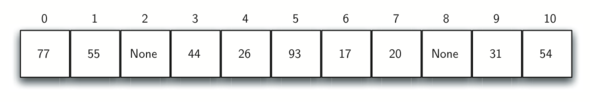
  
  44 sayısına baktığımızda, bir önceki konumu 1 numaralı slottu. Ancak boş slotu tek tek aramak yerine 3'er 3'er atlayarak aradığımızda karşımıza çıkan ilk boş slot, 3 numaralı slot oldu. Bu yüzden de 44, 3 numaralı slota yerleştirildi.

**Rehashing Kavramı**

Bir **collision (çarpışma)**'dan sonra başka bir slot arama işleminin genel adı **rehashing**'dir. **Simple linear probing (basit lineer araştırma)** ile **rehash fonksiyonunu** şu şekilde gösterebiliriz: 

***newhashvalue = rehash(oldhashvalue)*** = newhashvalue öğenin hash değeri, rehash ise hash değerini bulan bir fonksiyon olsun.

***rehash(pos) = (pos + 1) % sizeoftable*** = remainder method ile hash table'daki slot sayısına bölerek ve collision durumnda slotları sıralı olarak arayan bir fonksiyon. **(Simple Linear Probing)**

***rehash(pos) = (pos + 3) % sizeoftable*** = remainder method ile hash table'daki slot sayısına bölerek ve collision durumnda slotları 3'er 3'er atlayarak arayan bir fonksiyon.

**Dikkat edilmesi gereken şey :** Atlama boyutu, tablodaki tüm slotların ziyaret edileceği şekilde olması gerekmekte. Aksi durumda tablonun bir kısmı kullanılmayacaktır. Bunu sağlamak için genellikle, hash tablosunun bir asal sayı olması önerilir. Yukarıdaki örneklerde 11 sayısını kullanmamızın sebebi budur. 

**Quadratic Probing (İkinci Dereceden Araştırma)**

**Linear probing (lineer araştırma)** fikrinin bir başka varyasyonu, **Quadratic Probing (İkinci Dereceden Araştırma)** olarak adlandırılır. Bu varyasyonda, sabit bir atlama değeri kullanmak yerine, hash değerini **1, 3, 5, 7, 9** vb. artıran bir rehash işlevi kullanırız. Bu, ilk hash değeri h ise, diğer ardışık hash değerlerinin **h+1, h+4, h+9, h+16** olduğu anlamına gelir. Başka bir deyişle, **Quadratic probing (ikinci dereceden araştırma)**, birbirini izleyen tam karelerden oluşan bir atlama kullanır. **Quadratic probing** ile **rehash fonksiyonunu** şu şekilde ifade edebiliriz: 

***rehash(pos) = (h + i^2)*** = h remainder method ile bulunan hash değerini, rehash bu değeri **quadratic probing** tekniği ile artıran bir fonksiyonu temsil etmekte 

Aşağıdaki görselde, **quadratic probing (ikinci dereceden araştırma)** tekniği ile sayıların, slotlara yerleştirilmiş hali verilmiştir: 

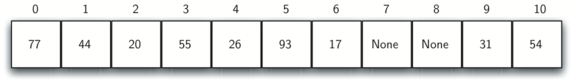

**Chaining (Zincirleme)**

**Collision resolution (çarpışma problemi)**'ni ele almak için bir başka alternatif yöntem, her slotun bir öğe koleksiyonuna (veya zincirine) referans tutmasına izin vermektir. Buna **Chaining (zincirleme)** denir. **Chaining**, birçok öğenin hash tablosunda aynı konumda bulunmasına izin verir. **Collision (Çarpışmalar)** meydana geldiğinde, öğe yine de hash tablosunun uygun slotuna yerleştirilir. Ancak unutmamak lazım ki, giderek daha fazla öğe aynı konuma ulaştıkça, koleksiyondaki öğeyi aramanın zorluğu artar. Aşağıdaki görselde, öğelerin **Chaining** ile slotlara yerleştirilmiş hali gösterilmektedir. 

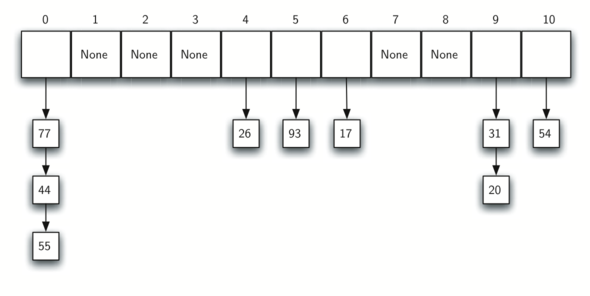

### < Implementing The HashMap Data Type (HashMap Veri Yapısını Uygulama) >  

Hashing'in bizim oluşturacağımız bir veri yapısı olacağından bahsetmiştik. Bu başlık altında, Python'da HashMap veri yapısını oluşturacağız. Bunun için Python'un dictionary veri yapısını kullanacağız. Bir dictionary, key-value şeklinde verileri depolayabilir. Key'i, ilişkili veri değerini aramak için kullanacağız. Bu fikre de genellikle **map** adı verilir. Bu yüzden de HashMap veri yapısı olarak adlandırılıyor sanırım :) Bir dictionary'nin en büyük faydalarından biri, bir key verildiğinde ilişkili veri değerini çok hızlı bir şekilde arayabilmemizi sağlamasıdır.

HashMap yapısı, bir key ve bir data değeri arasındaki sırasız bir ilişkiler koleksiyonudur. Bir map'teki bütün Key'ler benzersizdir. Bu nedenle bir key ile bir value arasında bire bir ilişki vardır.

**HashMap Veri Yapısı Sınıfında Olabilecek Metotlar :**

+ **Map() :** Yeni, boş bir map oluşturur.
+ **put(key, val) :** Map'e yeni bir key/value çifti ekler. Key zaten map'te mevcutsa, eski değer yeni değerle değiştirilir.
+ **get(key) :** Bir key verildiğinde, map'te depolanan değeri varsa o değeri (girilen key'in value karşılığını) yoksa None döndürür.
+ **del :** *del map[key]* ifadesini kullanarak key/value çiftini map'ten siler.
+ **len() :** Map'te saklanan key/value çiflerinin sayısını döndürür.
+ **in :** Verilen key, map'teyse True değilse False döndürür.

Aşağıdaki kod bloklarında HashMap veri yapısını ve hashing fikrini uygulayacağımız bir class oluşturalım.   

In [9]:
class HashTable:
    #1
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
    
    #2
    def hashfunction(self,key,size):
         return key%size
    
    #3
    def rehash(self,oldhash,size):
        return (oldhash+1)%size

    #4
    def put(self,key,data):
      #4.a
      hashvalue = self.hashfunction(key,len(self.slots))
        
      #4.b
      if self.slots[hashvalue] == None:
        self.slots[hashvalue] = key
        self.data[hashvalue] = data
        
      #4.c  
      else:
            
        #4.c.1
        if self.slots[hashvalue] == key:
          self.data[hashvalue] = data  #replace
        
        #4.c.2
        else:
          nextslot = self.rehash(hashvalue,len(self.slots))
          while self.slots[nextslot] != None and \
                          self.slots[nextslot] != key:
            nextslot = self.rehash(nextslot,len(self.slots))
            
          #4.d
          if self.slots[nextslot] == None:
            self.slots[nextslot]=key
            self.data[nextslot]=data
          else:
            self.data[nextslot] = data #replace

    #5        
    def get(self,key):
      startslot = self.hashfunction(key,len(self.slots))

      data = None
      stop = False
      found = False
      position = startslot
      while self.slots[position] != None and  \
                           not found and not stop:
         if self.slots[position] == key:
           found = True
           data = self.data[position]
         else:
           position=self.rehash(position,len(self.slots))
           if position == startslot:
               stop = True
      return data

    def delete(self, key):
        pass
    
    def length(self):
        pass    
    
    #6
    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)

In [10]:
H = HashTable()
H.put(54, "string 54")
H[26]="string 26"
H[93]="string 93"
H[17]="string 17"
H[77]="string 77"
H[31]="string 31"
H[44]="string 44"
H[55]="string 55"
H[20]="string 20"
print(H.slots)
print(H.data)

print(H[20])

print(H[17])
H[20]='duck'
print(H[20])
print(H[99])

[77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]
['string 77', 'string 44', 'string 55', 'string 20', 'string 26', 'string 93', 'string 17', None, None, 'string 31', 'string 54']
string 20
string 17
duck
None


+ 1-) **slots** isimli öznitelik, key öğelerini tutar. **data** isimli öznitelik, data öğelerini tutar. Hash table için başlangıç boyutunun 11 olarak seçildiğine dikkat edelim. Bu isteğe bağlı olsa da, **collision resolution (çarpışma çözümleme)** algoritmasının olabildiğince verimli olabilmesi için boyutun bir asal sayı olması önemlidir. **size** özniteliği 11 olduğunda, **slots** ve **data** öznitelikleri; *[None, None, None, None, None, None, None, None, None, None, None]* olarak başlar.


+ 2-) **hashfunction** metodu, **remainder method (kalan metodu)** yöntemini uygular. **Remainder method**, hash tablosuna yerleştirilecek öğenin hangi slota yerleştirileciğini yani, hash değerini hesaplar. **Yerleştirilecek öğe % slot sayısı** şekilinde hesaplanır. 


+ 3-) **rehash** metodu, **simple linear probing (lineer )**'dir. Yani **collision (çarpışma)** gerçekleştiğinde yeni bir slot arama işlemini, slotları sırayla gezerek yapar. Yukarıdaki, Rehashing Kavramı başlığı altında gösterdiğimiz gibi; **rehash(pos) = (pos + 1) % sizeoftable** şeklinde hesaplanır.


+ 4-) **put** metodu, hash tablosuna yeni bir öğe eklemeyi sağlar. **key** parametresi; **slots** özniteliğine, **data** parametresi; **data** özniteliğine yerleştirilir. 



+ 4.a-) **hashvalue** değişkeni, hash tablosuna eklenmek istenen öğenin hash değerini, **hashfunction** metodu ile hesaplar. **self.hashfunction** olarak yazıldığı için de bir öznitelik haline gelir.  


+ 4.b-) **if self.slots[hashvalue] == None** ifadesi; hesapladığımız hashvalue (hash değeri)'nin yerleştirilmesi gereken slotun boş olduğunu ifade eder. Eğer bu durum gerçekleşirse;  **key** parametresi; **slots** özniteliğinde yerleştirilmesi gereken indexe, **data** parametresi; **data** özniteliğinde yerleştirilmesi gereken indexe yerleştirilir. Örneğin hash değeri 3 çıkan bir öğemiz var ve 3 numaralı slot boş durumda. Bu öğe **slots** özniteliğine, bu öğenin karşılık geldiği data, **data** özniteliğine yerleştirilir.  


+ 4.c-) Eğer **if self.slots[hashvalue] == None** ifadesi sağlanmazsa yani, hesapladığımız hashvalue (hash değeri)'nin yerleştirilmesi gereken slot boş değilse; ya eklemek istediğimiz öğe o slottadır ya da **collision (çarpışma)** gerçekleşmiş demektir. Bu durumu **collision resolution (çarpışma çözümü)** başlığı altında, **simple linear probing (basit lineer araştırma)** kullanan **rehash** metodu ile boş bir slot bulana kadar slotları sırayla gezerek çözeceğiz. Boş bulduğumuz ilk slota da bu öğeyi yerleştireceğiz.


+ 4.c.1-) **if self.slots[hashvalue] == key** ifadesi; eklemek istediğimiz öğe, hash değerinin olduğu slotta demektir. Bu durum gerçekleşirse eklemek istediğimiz öğenin karşılık geldiği değer, **data** özniteliğinde karşılık gelen index değerine yerleştirilir. Bu da, **self.data[hashvalue] = data** ile yapılır.


+ 4.c.2-) **if self.slots[hashvalue] == key** koşulunun sağlanmaması, eklemek istediğimiz öğenin yerinde başka bir öğenin olduğu anlamına gelir. Yani **collision (çarpışma)** gerçekleşmiş demektir. **Collision resolution (çarpışma çözümü)**'nün yapılması gerekir. Bu da, **simple linear probing (basit lineer araştırma)** içeren **rehash** metodu ile yapılır. Eklenmek istenen öğenin, hash değerine denk gelen slot dolu olduğundan, boş bir slot bulana kadar slotları sırayla gezineceğiz. 

  **nextslot** olarak tanımladığımız değişken, **rehash** metodunu kullanarak eklemek istediğimiz öğenin hash değerini 1 arttırılmış halini temsil edecek. **self.rehash** olarak yazdığımız için de **nextslot** değişkeni bir öznitelik haline gelmiş olacak
  
  while döngüsü, **self.slots[nextslot] != None** olduğu (yani eklemek istediğimiz öğeyi yerleştirmek için baktığımız bir sonraki slot da doluysa döngü devam edecek) ve **self.slots[nextslot] != key** olduğu sürece (yani eklemek istediğimiz öğeyi yerleştirmek için baktığımız bir sonraki slot, eklemek istediğimiz öğeye eşit olmadığı sürece) döngü devam edecek. Ve while döngüsü altında, **nextslot**'un değeri sürekli 1'er 1'er artacak (**nextslot = self.rehash(nextslot,len(self.slots))**). Bunun sebebi ise yukarıda bahsettiğimiz gibi slotları sırayla gezinmemizi sağlamak.
      

+ 4.d-) **if self.slots[nextslot] == None**, eklemek istediğimiz öğenin eklenmesi gereken slot dolu olduğunda bir sonraki slota bakarız. Bu kod, baktığımız bir sonraki slotun, None yani boş olması durumunu ifade etmekte. Bu durum gerçekleşirse, eklemek istediğimiz öğe **slots** özniteliğinde **nextslot**'uncu slota, eklemek istediğimiz öğenin karşılık geldiği değer **data** özniteliğinde **nextslot**'uncu değere yerleştirilir. Eğer bu durum gerçekleşmezse, **self.data[nextslot] = data** gerçekleşir.


+ 5-) **get** metodu, girilen key'in slot'larda varsa karşılık gelen data değerini, yoksa False döndürür. **get** metodu, ilk önce hash değerini hesaplayarak başlar (**startslot = self.hashfunction(key,len(self.slots))**). Değer ilk slotta değilse, bir sonraki olası konumu bulmak için yeniden düzenleme kullanılır. **if position == startslot** satırının, ilk slota geri dönmediğimizden emin olmak için kontrol ederek aramanın sona ereceğini garanti eder. Böyle bir durumda, olası tüm slot tüketmişizdir ve bu da öğenin mevcut olmadığı anlamına gelir.


+ 6-) Ek sözlük işlevselliği sağlar. ``[]`` kullanarak erişime izin vermek için __getitem__ ve __setitem__ yöntemlerini aşırı yüklüyoruz. Bu, bir HashTable oluşturulduktan sonra tanıdık dizin operatörünün kullanılabilir olacağı anlamına gelir. 

### < Analysis Of Hashing (Hashing Analizi) >

En iyi durumda hashing işleminin bir **O(1)** sabit zamanlı arama tekniği sağlayacağını daha önce söylemiştik. Ancak, çarpışmalar nedeniyle, karşılaştırma sayısı genellikle o kadar basit değildir. Tam bir karma analizi bu metnin kapsamı dışında olsa da, bir öğeyi aramak için gerekli karşılaştırmaların sayısına yaklaşan bazı iyi bilinen sonuçları belirtebiliriz. Bir hash tablosunun kullanımını analiz etmek için ihtiyaç duyduğumuz en önemli bilgi, yük faktörüdür, **λ**  . Kavramsal olarak, **λ**  küçükse, çarpışma olasılığı daha düşüktür, bu da öğelerin ait oldukları yuvalarda olma ihtimalinin daha yüksek olduğu anlamına gelir. **λ**  büyükse, yani hash table doluyorsa, o zaman giderek daha fazla çarpışma olur. Bu, çarpışma çözümünün daha zor olduğu ve boş bir yuva bulmak için daha fazla karşılaştırma gerektirdiği anlamına gelir. Zincirleme ile artan çarpışmalar, her zincirde artan sayıda öğe anlamına gelir. Daha önce olduğu gibi, hem başarılı hem de başarısız bir arama için bir sonucumuz olacak. Doğrusal tarama ile açık adresleme kullanan başarılı bir arama için ortalama karşılaştırma sayısı yaklaşık **1/2(1 + 1/1-λ)** ve başarısız bir arama **1/2(1 + (1/1-λ)^2)** verir. zincirleme kullanıyorlar, başarılı durum için ortalama karşılaştırma sayısı **1 + λ/2** ve arama başarısız olursa basitçe **λ**  karşılaştırmadır.